# Time Series RNN

In [6]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the sequence length and number of features
sequence_length = 100  # Number of previous days to consider
num_features = 2  # Number of input features (Value1 and Value2)

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0[:, :x.size(0), :])
        out = self.fc(out[:, -1, :])
        return out

# Define the hyperparameters
input_size = sequence_length
hidden_size = 64
num_layers = 2
output_size = num_features

# Create an instance of the RNN model
model = RNN(input_size, hidden_size, num_layers, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



## Temp Placing

In [40]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def smape(y, y_pred):
    """ 
    A function to calculate the symmetric mean absolute percentage error (sMAPE).

    Arguments
    ----------
    y: np.ndarray
        the response data
    y_pred: np.ndarray
        the predicted/forecasted outputs
        
    Returned Values
    ----------
    sMAPE : float

    """   
    return 200 * torch.sum(torch.abs(y-y_pred) / (torch.abs(y) + torch.abs(y_pred))) / len(y)

def mae(y, y_pred) :
    """ 
    A function to calculate the mean absolute error (MAE).

    Arguments
    ----------
    y: np.ndarray
        the response data
    y_pred: np.ndarray
        the predicted/forecasted outputs
        
    Returned Values
    ----------
    MAE : float

    """   
    return torch.sum(torch.abs(y-y_pred))/len(y)

def sst(y) :
    """ 
    A function to calculate the sum of squares total (SST).

    Arguments
    ----------
    y: np.ndarray
        the response data
        
    Returned Values
    ----------
    SST : float
    """ 
    return torch.sum((y-torch.mean(y))**2)

def sse(y, y_pred) :
    """ 
    A function to calculate the sum of squared errors (SSE).

    Arguments
    ----------
    y: np.ndarray
        the response data
    y_pred: np.ndarray
        the predicted/forecasted outputs
        
    Returned Values
    ----------
    SSE : float

    """   
    return torch.sum((y-y_pred)**2)

def r2(y, y_pred) :
    """ 
    A function to calculate R squared (r2).

    Arguments
    ----------
    y: np.ndarray
        the response data
    y_pred: np.ndarray
        the predicted/forecasted outputs
        
    Returned Values
    ----------
    r2 : float

    """   
    return 1-sse(y, y_pred)/sst(y)


def mse(y, y_pred):
   # return torch.mean((y - y_pred)**2)
    return sse(y, y_pred)/len(y)


def rmse(y, y_pred):
    return torch.sqrt(mse(y, y_pred))


# Assuming your data is stored in a CSV file, you can load it into a pandas DataFrame
dataComp = pd.read_csv("UsCovidDatacomplete.csv", header=None, names=["Date", "RetailRecreation", "GroceryPharmacy", "Parks", "Transit", "Workplace", "Residential", "Hospitalization", "Death" ])

# Convert the "Date" column to a pandas DateTime object
dataComp["Date"] = pd.to_datetime(dataComp["Date"])

# Sort the data by date if it's not already sorted
dataComp.sort_values("Date", inplace=True)

##----------------------------------------------

# Assuming your data is stored in a CSV file, you can load it into a pandas DataFrame
data = pd.read_csv("UsCovidData.csv", header=None, names=["Date", "RetailRecreation", "GroceryPharmacy", "Parks", "Transit", "Workplace", "Residential", "Hospitalization", "Death" ])

# Convert the "Date" column to a pandas DateTime object
data["Date"] = pd.to_datetime(data["Date"])

# Sort the data by date if it's not already sorted
data.sort_values("Date", inplace=True)

# Extract the values as numpy arrays
RetailRecreation = data["RetailRecreation"].values.astype(float)
GroceryPharmacy = data["GroceryPharmacy"].values.astype(float)
Parks = data["Parks"].values.astype(float)
Transit = data["Transit"].values.astype(float)
Workplace = data["Workplace"].values.astype(float)
Residential = data["Residential"].values.astype(float)
Hospitalization = data["Hospitalization"].values.astype(float)
Death = data["Death"].values.astype(float)

# Normalize the data
normalized_RetailRecreation = (RetailRecreation - np.mean(RetailRecreation)) / np.std(RetailRecreation)
normalized_GroceryPharmacy = (GroceryPharmacy - np.mean(GroceryPharmacy)) / np.std(GroceryPharmacy)
normalized_Parks = (Parks - np.mean(Parks)) / np.std(Parks)
normalized_Transit = (Transit - np.mean(Transit)) / np.std(Transit)
normalized_Workplace = (Workplace - np.mean(Workplace)) / np.std(Workplace)
normalize_Residential = (Residential - np.mean(Residential)) / np.std(Residential)
normalized_Hospitalization = (Hospitalization - np.mean(Hospitalization)) / np.std(Hospitalization)
normalized_Death = (Death - np.mean(Death)) / np.std(Death)


# Define the sequence length and number of features
sequence_length = 10  # Number of previous days to consider
num_features = 8  # Number of input features (Value1 and Value2)

# Create input sequences and corresponding targets
input_sequences = []
targets = []

## all input - sequence length last days
for i in range(len(normalized_Hospitalization) - sequence_length ):
    seq = np.array([
                    normalized_RetailRecreation[i:i+sequence_length], normalized_GroceryPharmacy[i:i+sequence_length], 
                    normalized_Parks[i:i+sequence_length], normalized_Transit[i:i+sequence_length], 
                    normalized_Workplace[i:i+sequence_length], normalize_Residential[i:i+sequence_length] ,
                      normalized_Hospitalization[i:i+sequence_length], normalized_Death[i:i+sequence_length],  ])
    input_sequences.append(seq)
    targets.append([
                    normalized_RetailRecreation[i+sequence_length], normalized_GroceryPharmacy[i+sequence_length], 
                    normalized_Parks[i+sequence_length], normalized_Transit[i+sequence_length], 
                    normalized_Workplace[i+sequence_length], normalize_Residential[i+sequence_length] , 
                     normalized_Hospitalization[i+sequence_length], normalized_Death[i+sequence_length],  ])

# Convert the input sequences and targets to PyTorch tensors
input_sequences = torch.tensor(input_sequences).float()
#print(input_sequences)
#targets = torch.tensor(np.concatenate(targets)).float()
targets = torch.tensor(targets).float()


## -------------------------------------------------------------------------


# Assuming your data is stored in a CSV file, you can load it into a pandas DataFrame
dataTest = pd.read_csv("TestUsCovidData.csv", header=None, names=["Date", "RetailRecreation", "GroceryPharmacy", "Parks", "Transit", "Workplace", "Residential", "Hospitalization", "Death" ])
# Convert the "Date" column to a pandas DateTime object
dataTest["Date"] = pd.to_datetime(dataTest["Date"])

# Sort the data by date if it's not already sorted
dataTest.sort_values("Date", inplace=True)

# Extract the values as numpy arrays
RetailRecreationTest = dataTest["RetailRecreation"].values.astype(float)
GroceryPharmacyTest = dataTest["GroceryPharmacy"].values.astype(float)
ParksTest = dataTest["Parks"].values.astype(float)
TransitTest = dataTest["Transit"].values.astype(float)
WorkplaceTest = dataTest["Workplace"].values.astype(float)
ResidentialTest = dataTest["Residential"].values.astype(float)
HospitalizationTest = dataTest["Hospitalization"].values.astype(float)
DeathTest = dataTest["Death"].values.astype(float)

# Normalize the data
normalized_RetailRecreationTest = (RetailRecreationTest - np.mean(RetailRecreationTest)) / np.std(RetailRecreationTest)
normalized_GroceryPharmacyTest = (GroceryPharmacyTest - np.mean(GroceryPharmacyTest)) / np.std(GroceryPharmacyTest)
normalized_ParksTest = (ParksTest - np.mean(ParksTest)) / np.std(ParksTest)
normalized_TransitTest = (TransitTest - np.mean(TransitTest)) / np.std(TransitTest)
normalized_WorkplaceTest = (WorkplaceTest - np.mean(WorkplaceTest)) / np.std(WorkplaceTest)
normalize_ResidentialTest = (ResidentialTest - np.mean(ResidentialTest)) / np.std(ResidentialTest)
normalized_HospitalizationTest = (HospitalizationTest - np.mean(HospitalizationTest)) / np.std(HospitalizationTest)
normalized_DeathTest = (DeathTest - np.mean(DeathTest)) / np.std(DeathTest)

# Define the sequence length and number of features
# Create input sequences and corresponding targets
input_sequencesTest = []
targetsTest = []

## all input - sequence length last days
for j in range(len(normalized_HospitalizationTest) - (sequence_length) ):
    seqTest = np.array([
                    normalized_RetailRecreationTest[j:j+sequence_length], normalized_GroceryPharmacyTest[j:j+sequence_length], 
                    normalized_ParksTest[j:j+sequence_length], normalized_TransitTest[j:j+sequence_length], 
                    normalized_WorkplaceTest[j:j+sequence_length], normalize_ResidentialTest[j:j+sequence_length] ,
                    normalized_HospitalizationTest[j:j+sequence_length], normalized_DeathTest[j:j+sequence_length],  ])

    input_sequencesTest.append(seqTest)
    targetsTest.append([
                    normalized_RetailRecreationTest[j+sequence_length], normalized_GroceryPharmacyTest[j+sequence_length], 
                    normalized_ParksTest[j+sequence_length], normalized_TransitTest[j+sequence_length], 
                    normalized_WorkplaceTest[j+sequence_length], normalize_ResidentialTest[j+sequence_length] , 
                     normalized_HospitalizationTest[j+sequence_length], normalized_DeathTest[j+sequence_length],  ])


# Convert the input sequences and targets to PyTorch tensors
input_sequencesTest = torch.tensor(input_sequencesTest).float()

#targets = torch.tensor(np.concatenate(targets)).float()
targetsTest= torch.tensor(targetsTest).float()

## -------------------------------------------------------------------------


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        out, _ = self.rnn(x, h0[:, :x.size(0), :])
        out = self.fc(out[:, -1, :])
        return out

# Define the hyperparameters
input_size = sequence_length
hidden_size = 64
num_layers = 2
output_size = num_features

# Create an instance of the RNN model
model = RNN(input_size, hidden_size, num_layers, output_size)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the input sequences and targets to the device
input_sequences = input_sequences.to(device)
input_sequencesTest = input_sequencesTest.to(device)

targets = targets.to(device)

# Move the model to the device
model = model.to(device)

# ... previous code ...

# Set the number of training epochs
num_epochs = 1000

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Set the device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the input sequences and targets to the device
input_sequences = input_sequences.to(device)
input_sequencesTest = input_sequencesTest.to(device)
targets = targets.to(device)

# Move the model to the device
model = model.to(device)

# Training loop
for epoch in range(num_epochs):
    model.train()
    outputs = model(input_sequences)
    loss = criterion(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")
        model.eval()

        with torch.no_grad():
            val_outputs = model(input_sequencesTest)

        val_outputs = val_outputs.cpu().numpy()
        val_outputs = torch.tensor(val_outputs).float()

        ##------------------------------------------
        rmse_value = rmse(targetsTest, val_outputs)
        print("RMSE:", rmse_value.item()) 

        mse_value = mse(targetsTest, val_outputs)
        print("MSE:", mse_value.item())  

        r2_value = r2(targetsTest, val_outputs)
        print("R2:", r2_value.item()) 

        sse_value = sse(targetsTest, val_outputs)
        print("SSE:", sse_value.item())

        sst_value = sst(targetsTest)
        print("SST:", sst_value.item()) 

        mae_value = mae(targetsTest, val_outputs)
        print("MAE:", mae_value.item()) 

        smape_value = smape(targetsTest, val_outputs)
        print("SMAPE:", smape_value.item())          

Epoch 100/1000, Loss: 0.16267187893390656
RMSE: 2.0006372928619385
MSE: 4.002549648284912
R2: 0.333828330039978
SSE: 160.10198974609375
SST: 240.33143615722656
MAE: 3.3692078590393066
SMAPE: 697.8236083984375
Epoch 200/1000, Loss: 0.05809357017278671
RMSE: 2.0192649364471436
MSE: 4.077430725097656
R2: 0.3213654160499573
SSE: 163.09722900390625
SST: 240.33143615722656
MAE: 3.4818572998046875
SMAPE: 705.4049682617188
Epoch 300/1000, Loss: 0.023911863565444946
RMSE: 2.0206589698791504
MSE: 4.083062648773193
R2: 0.3204280138015747
SSE: 163.322509765625
SST: 240.33143615722656
MAE: 3.436704158782959
SMAPE: 703.5173950195312
Epoch 400/1000, Loss: 0.014357968233525753
RMSE: 2.039457321166992
MSE: 4.15938663482666
R2: 0.3077249526977539
SSE: 166.37545776367188
SST: 240.33143615722656
MAE: 3.4685237407684326
SMAPE: 713.271728515625
Epoch 500/1000, Loss: 0.009440147317945957
RMSE: 2.0414247512817383
MSE: 4.167415142059326
R2: 0.3063886761665344
SSE: 166.6966094970703
SST: 240.33143615722656
MAE:

## Plot Our Model's evaluation

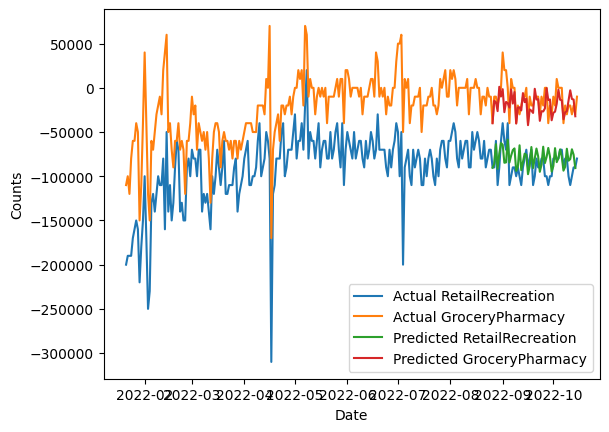

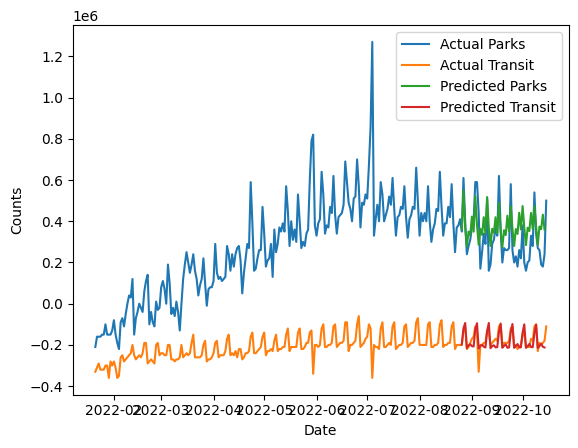

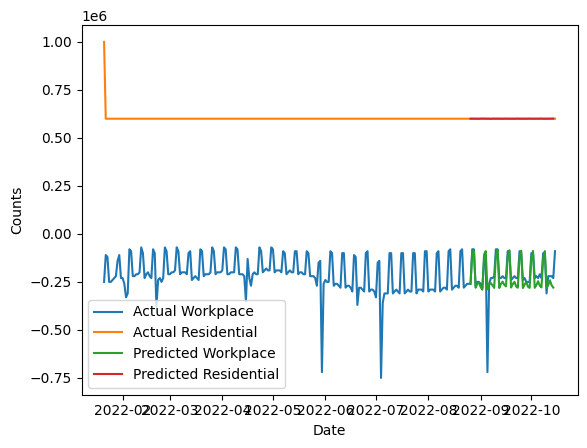

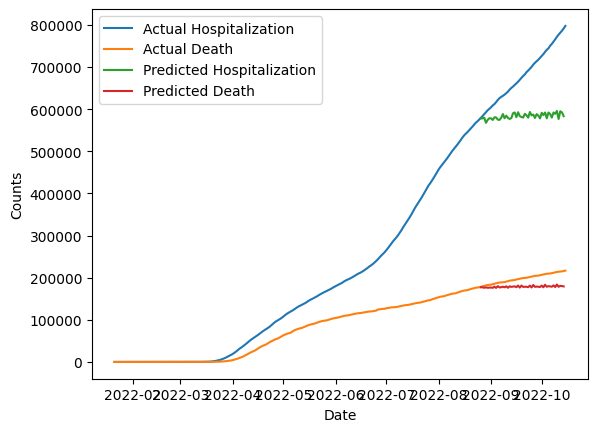

In [29]:
# Switch the model to evaluation mode
model.eval()
# ... previous code ...
daysToPredict = 50

# Generate predictions
with torch.no_grad():
    
    future_sequence = input_sequences[-1].unsqueeze(0)  # Use the last input sequence as the initial future sequence
    future_sequence = future_sequence.to(device)

    predicted_values = []
    

    for _ in range(daysToPredict):  
        predictions = model(future_sequence)
   
        predicted_values.append(predictions.squeeze().tolist())

        # Update the future sequence by removing the first input and appending the new predictions
        new_predictions = torch.tensor([predicted_values[-1]]).unsqueeze(0).to(device)
        future_sequence = torch.cat((future_sequence[:, :, 1:], new_predictions.transpose(1, 2)), dim=2)

# Denormalize the predicted values
predicted_values = np.array(predicted_values)

predicted_values[:, 0] = (predicted_values[:, 0] * np.std(RetailRecreation)) + np.mean(RetailRecreation)
predicted_values[:, 1] = (predicted_values[:, 1] * np.std(GroceryPharmacy)) + np.mean(GroceryPharmacy)
predicted_values[:, 2] = (predicted_values[:, 2] * np.std(Parks)) + np.mean(Parks)
predicted_values[:, 3] = (predicted_values[:, 3] * np.std(Transit)) + np.mean(Transit)
predicted_values[:, 4] = (predicted_values[:, 4] * np.std(Workplace)) + np.mean(Workplace)
predicted_values[:, 5] = (predicted_values[:, 5] * np.std(Residential)) + np.mean(Residential)
predicted_values[:, 6] = (predicted_values[:, 6] * np.std(Hospitalization)) + np.mean(Hospitalization)
predicted_values[:, 7] = (predicted_values[:, 7] * np.std(Death)) + np.mean(Death)

# Generate dates for the future predictions
start_date = dataComp["Date"].iloc[-1] - pd.Timedelta(days=50)

dates = pd.date_range(start=start_date, periods=daysToPredict)

#dates = pd.date_range(start=(data["Date"].iloc[-1]), periods=daysToPredict)
#names=["Date", "RetailRecreation", "GroceryPharmacy", "Parks", "Transit", "Workplace", "Residential", "Hospitalization", "Death" ])

plt.plot(dataComp["Date"], dataComp["RetailRecreation"] * 10000, label="Actual RetailRecreation")
plt.plot(dataComp["Date"], dataComp["GroceryPharmacy"] * 10000, label="Actual GroceryPharmacy")

plt.plot(dates, (predicted_values[:, 0]* 10000 ), label="Predicted RetailRecreation")
plt.plot(dates, predicted_values[:, 1]* 10000, label="Predicted GroceryPharmacy")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend()

plt.show() # 7pm 226

plt.plot(dataComp["Date"], dataComp["Parks"] * 10000, label="Actual Parks")
plt.plot(dataComp["Date"], dataComp["Transit"] * 10000, label="Actual Transit")

plt.plot(dates, (predicted_values[:, 2]* 10000 ), label="Predicted Parks")
plt.plot(dates, predicted_values[:, 3]* 10000, label="Predicted Transit")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend()

plt.show() # 7pm 226

plt.plot(dataComp["Date"], dataComp["Workplace"] * 10000, label="Actual Workplace")
plt.plot(dataComp["Date"], dataComp["Residential"] * 100000, label="Actual Residential")

plt.plot(dates, predicted_values[:, 4]* 10000, label="Predicted Workplace")
plt.plot(dates, predicted_values[:, 5]* 100000, label="Predicted Residential")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend()

plt.show() # 7pm 226
# Plot the actual values and predicted values
plt.plot(dataComp["Date"], (dataComp["Hospitalization"] / 10), label="Actual Hospitalization")
plt.plot(dataComp["Date"], dataComp["Death"], label="Actual Death")

plt.plot(dates, (predicted_values[:, 6] / 10), label="Predicted Hospitalization")
plt.plot(dates, predicted_values[:, 7], label="Predicted Death")
plt.xlabel("Date")
plt.ylabel("Counts")
plt.legend()

plt.show() # 7pm 226

# implementing 
# formalize knowledge idea partial data and built up models on top
# human inspired machine learning computerize idea of 1000 brains. 
# dr tianmen liu pre print. 
# https://www.researchgate.net/publication/369592298_When_Brain-inspired_AI_Meets_AGI
# https://www.numenta.com/resources/research-publications/papers/

# 
# compile lots of features. 
# R not test bed perdiction only RNN. 
# Knowledge embedding
# BTD is for knowledge embedding
# 


## Connecting to Neo4j via py2neo

In [1]:
from py2neo import Graph
import re

from neo4j import GraphDatabase
from datetime import datetime
# Connect to the Neo4j database
# Remember to change password to your own when running the program. 
graph = Graph("bolt://localhost:7687", user="neo4j", password="Texaco10?123")

# Define the Cypher query to retrieve all data
# county
query = """
MATCH (country:Country)-[:HAS_VARIANT]->(variant:Variant)
OPTIONAL MATCH (variant)-[:HAS_FACTOR]->(factor:Factor)
RETURN country.name AS country, variant.name AS variant, factor.name AS factor, factor.value AS value
"""

result = graph.run(query)

# Create empty lists to store the parsed data
countries = []
variants = []


# Parse the data from the query result
for record in result:
    countries.append(record["country"])
    variants.append(record["variant"])

    factor = record["factor"]
    value = record["value"]

    if factor == "Mortality":
        mortality = value
    elif factor == "Infectiousness":
        infectiousness = value

# Define the Cypher query to retrieve the date value
query = """
MATCH (variant:Variant {name: 'Omicron'})
RETURN date(variant.date) AS date
"""

# Execute the Cypher query and retrieve the date value
result = graph.run(query)
date_value = str(result)



# Extract the date string within the parentheses
date_string = date_value[date_value.find("(") + 1 : date_value.find(")")]
date_string = pd.to_datetime(date_string)

# Parse the date string

print(date_string)
#relation1 = [row['relationship'] for row in results]
#tail1 = [row['english_word'] for row in results]
print(mortality)
print(infectiousness)


ConnectionUnavailable: Cannot open connection to ConnectionProfile('bolt://localhost:7687')

## Concat Data RNN